In [217]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from statistics import *
import heartpy as hp
import copy
from IPython.display import display
pd.options.display.max_rows = 450

# %load_ext autoreload
# %autoreload 2
import pwv
import importlib
importlib.reload(pwv)

<module 'pwv' from '/Users/amitvallabh/Downloads/PWV/full_demo/pwv.py'>

# Preprocessing

<IPython.core.display.Javascript object>


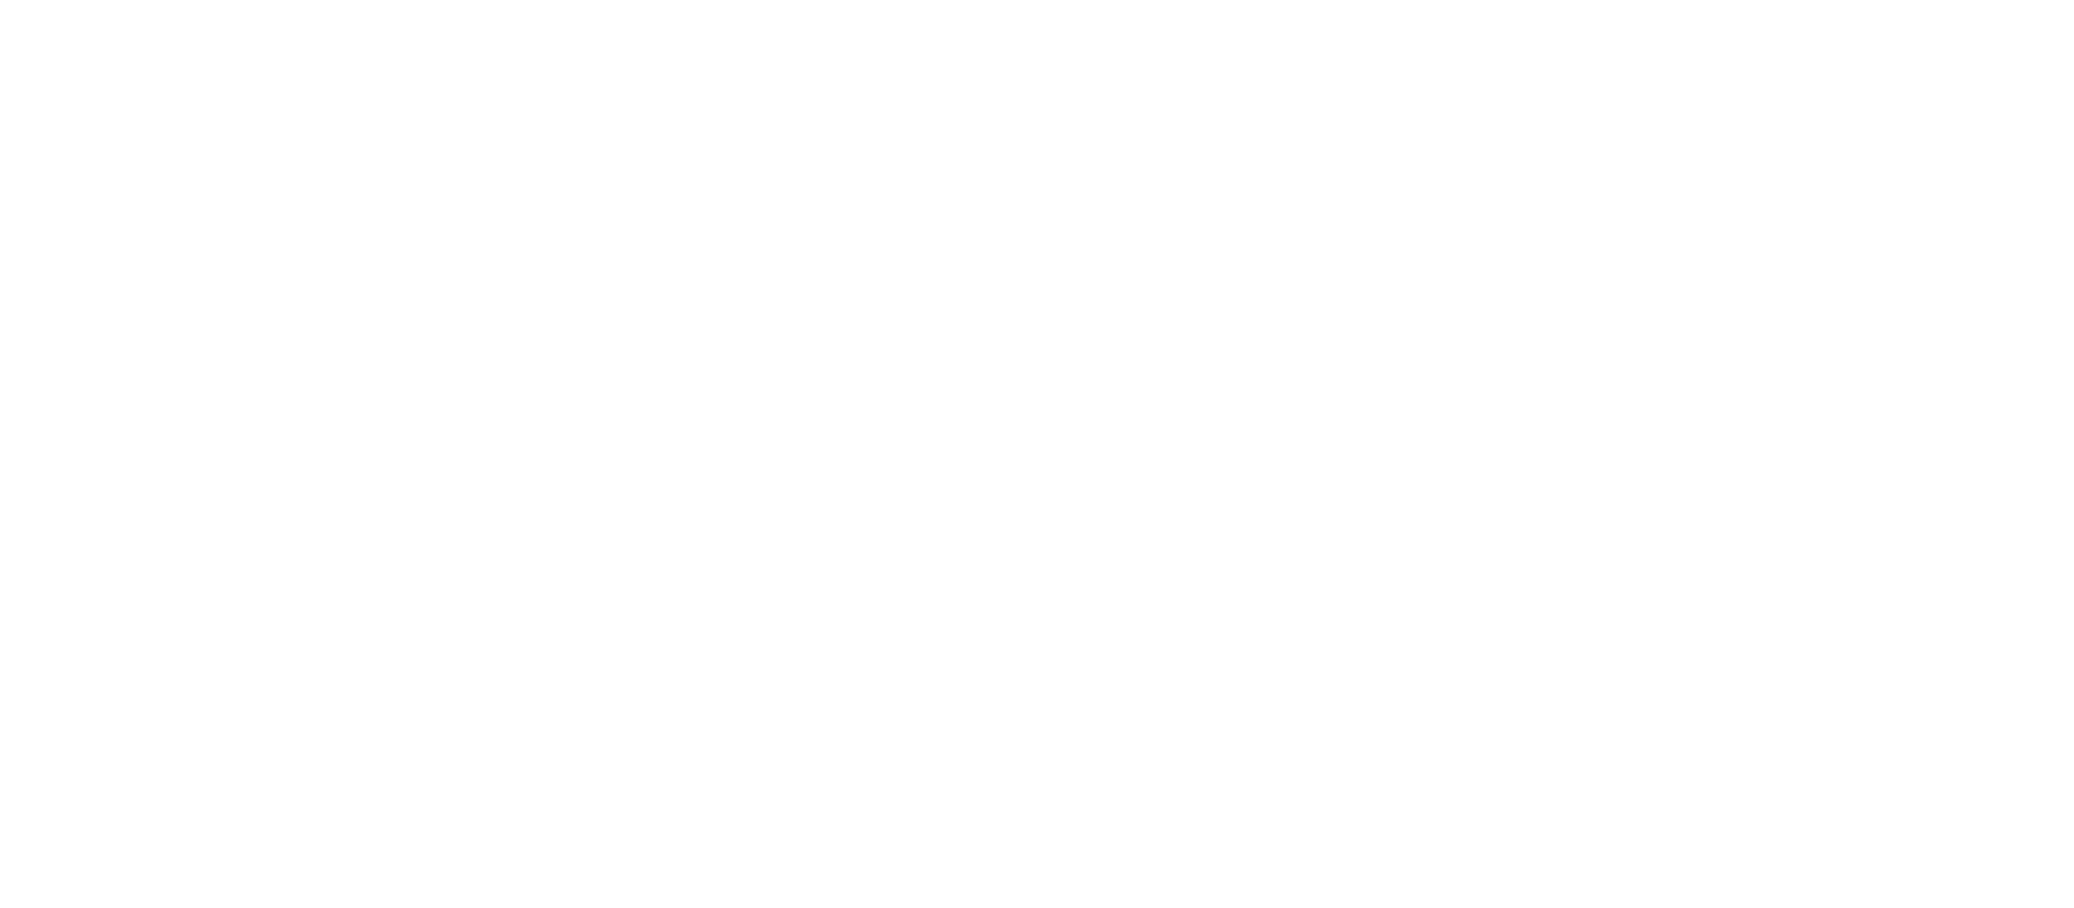

<IPython.core.display.Javascript object>


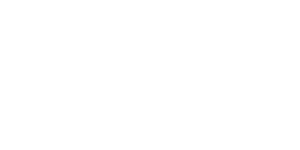

/Users/amitvallabh/Downloads/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amitvallabh/Downloads/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/amitvallabh/Downloads/anaconda3/lib/python3.8/site-packages/numpy/ma/core.py:5243: RuntimeWarning: Mean of empty slice.
  result = super(MaskedArray, self).mean(axis=axis,
/Users/amitvallabh/Downloads/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


<IPython.core.display.Javascript object>


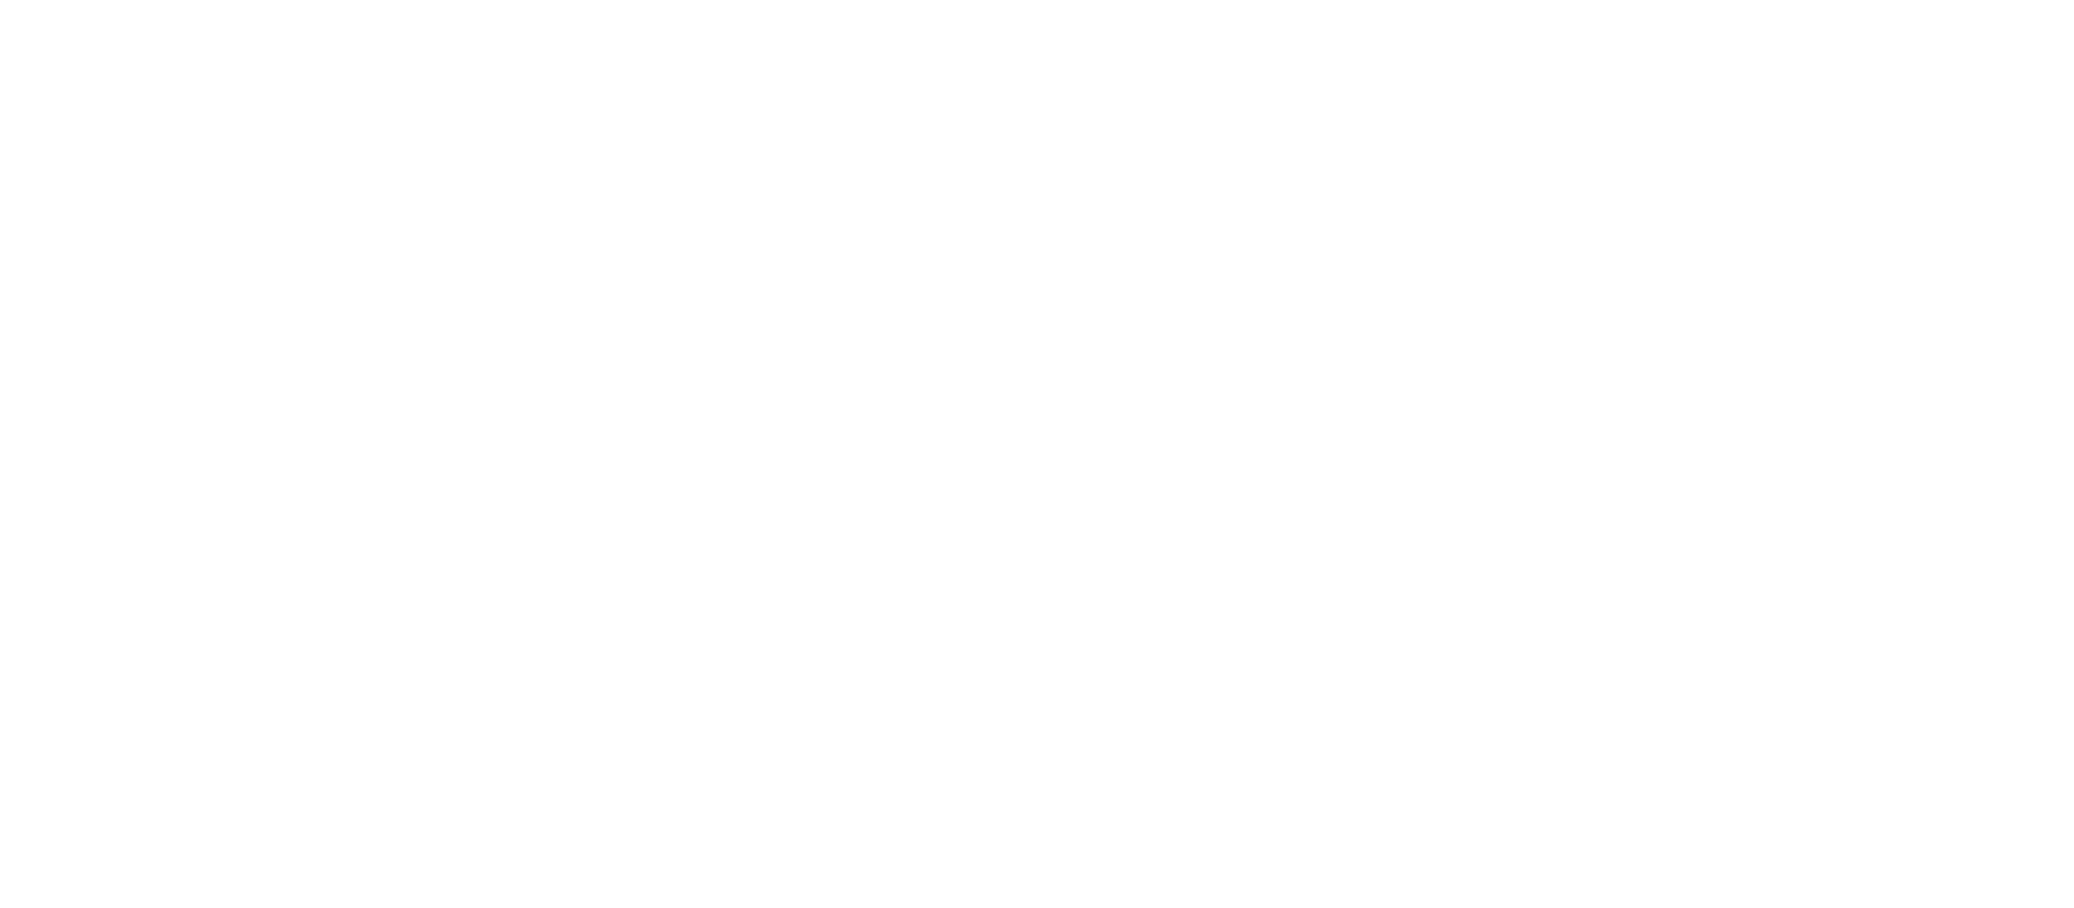

<IPython.core.display.Javascript object>


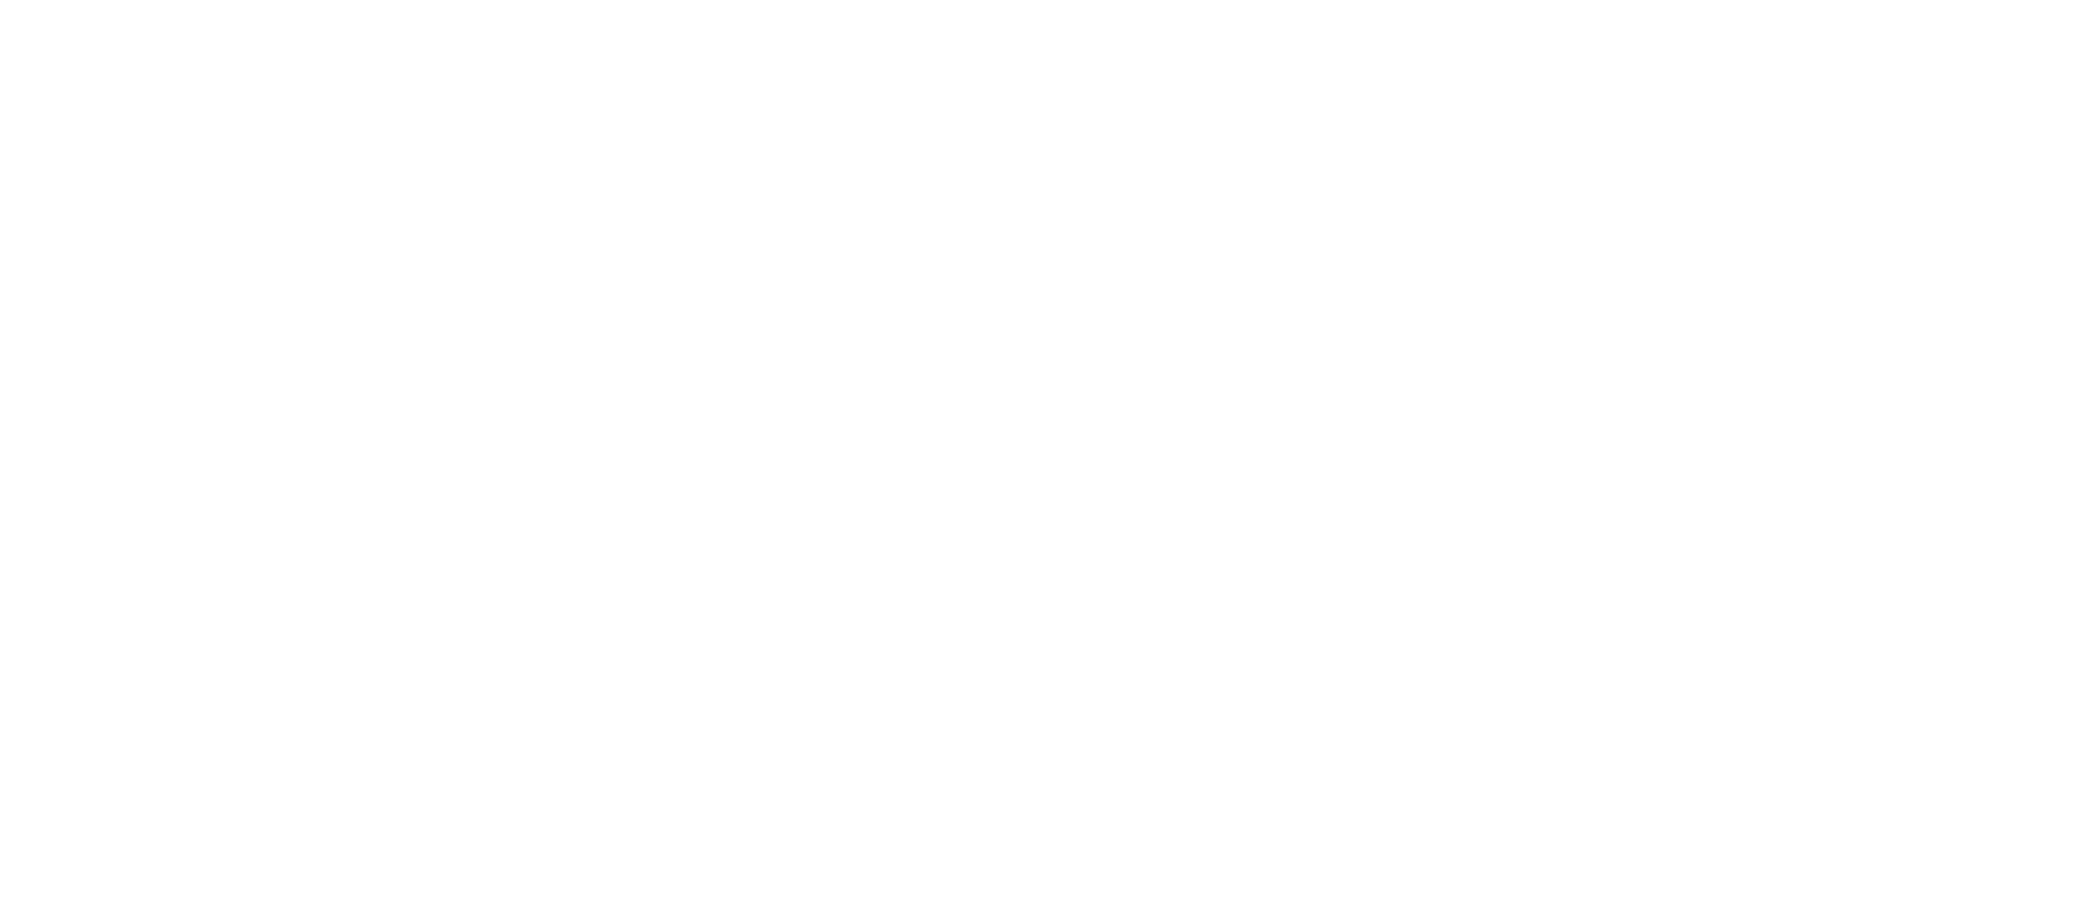

In [251]:
waveformData, segmentIndices, plots = pwv.preprocess("/Users/amitvallabh/Downloads/PWV/Data/Raw Data", returnPlot=[True, True, True])

## Filtering Waveforms

### Raw Waveforms

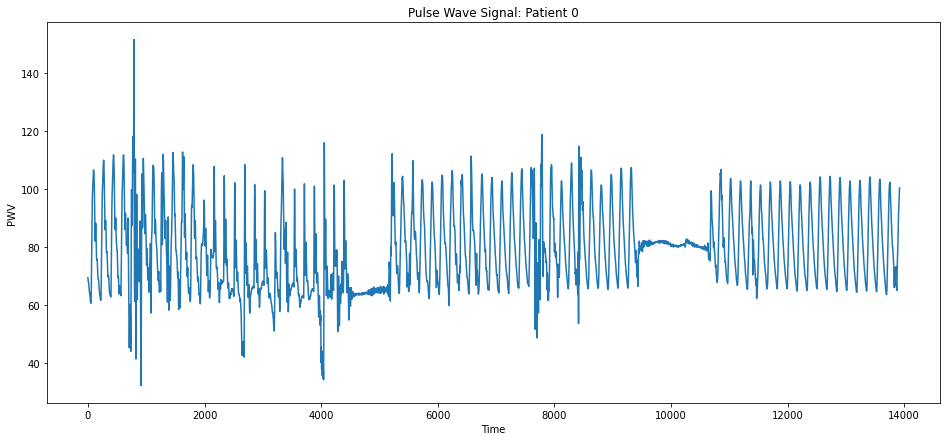

In [3]:
plots[0]

We can filter the waveform using highpass and lowpass Butterworth filters to get a smoother wave.

<IPython.core.display.Javascript object>


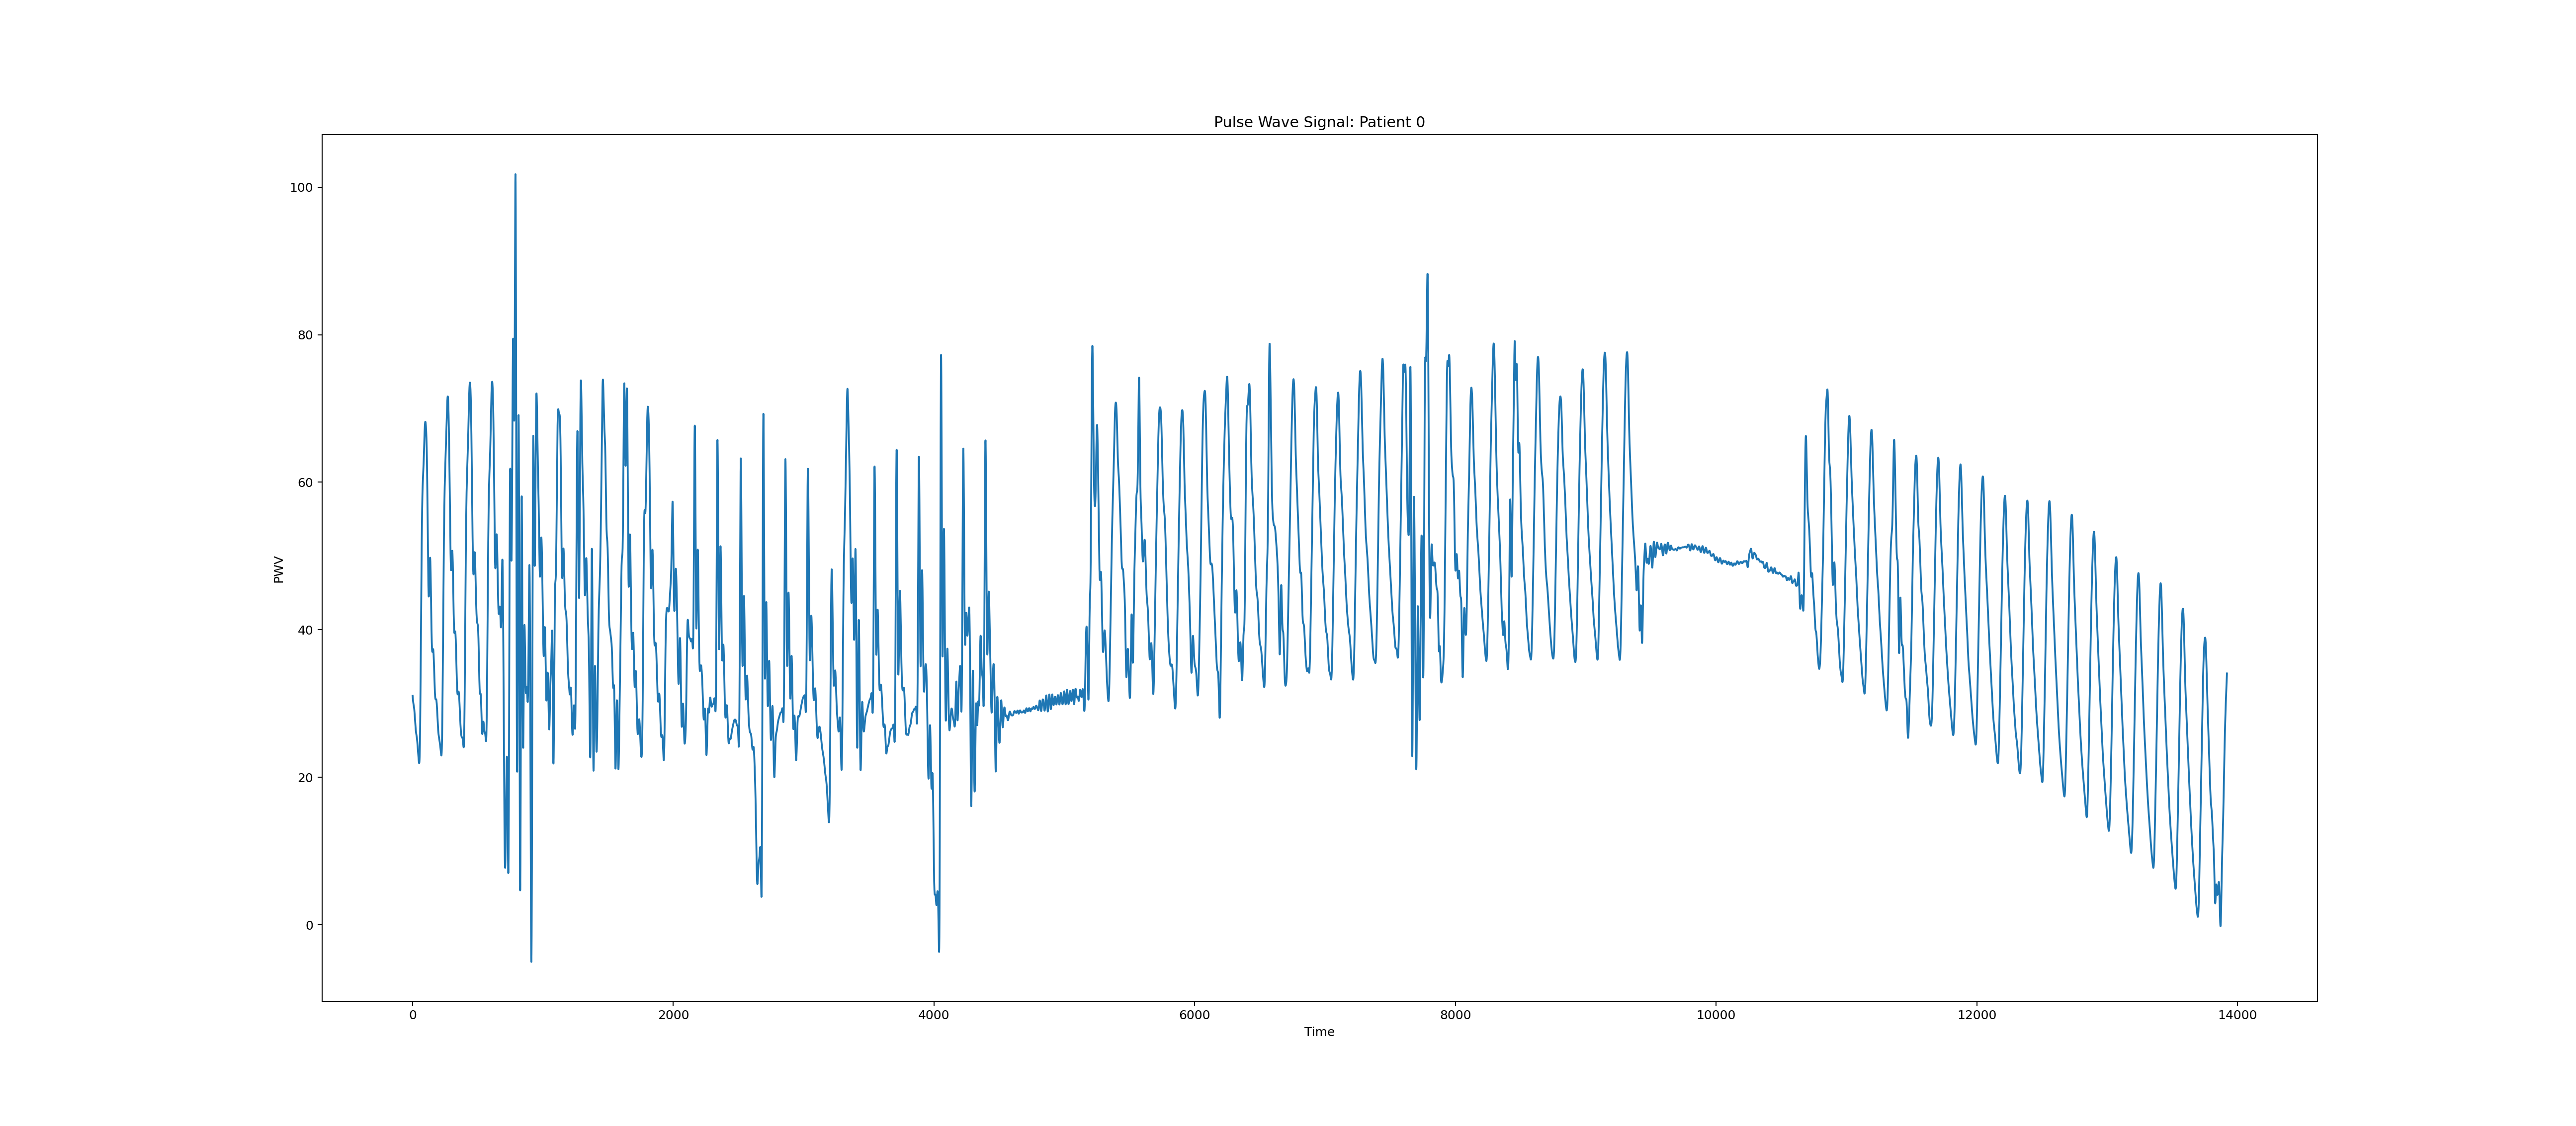

In [106]:
plots[1]

## Segmentation of Waveforms
Below is the filtered waveform for patient 0. We will examine the first 4000 values.

<IPython.core.display.Javascript object>


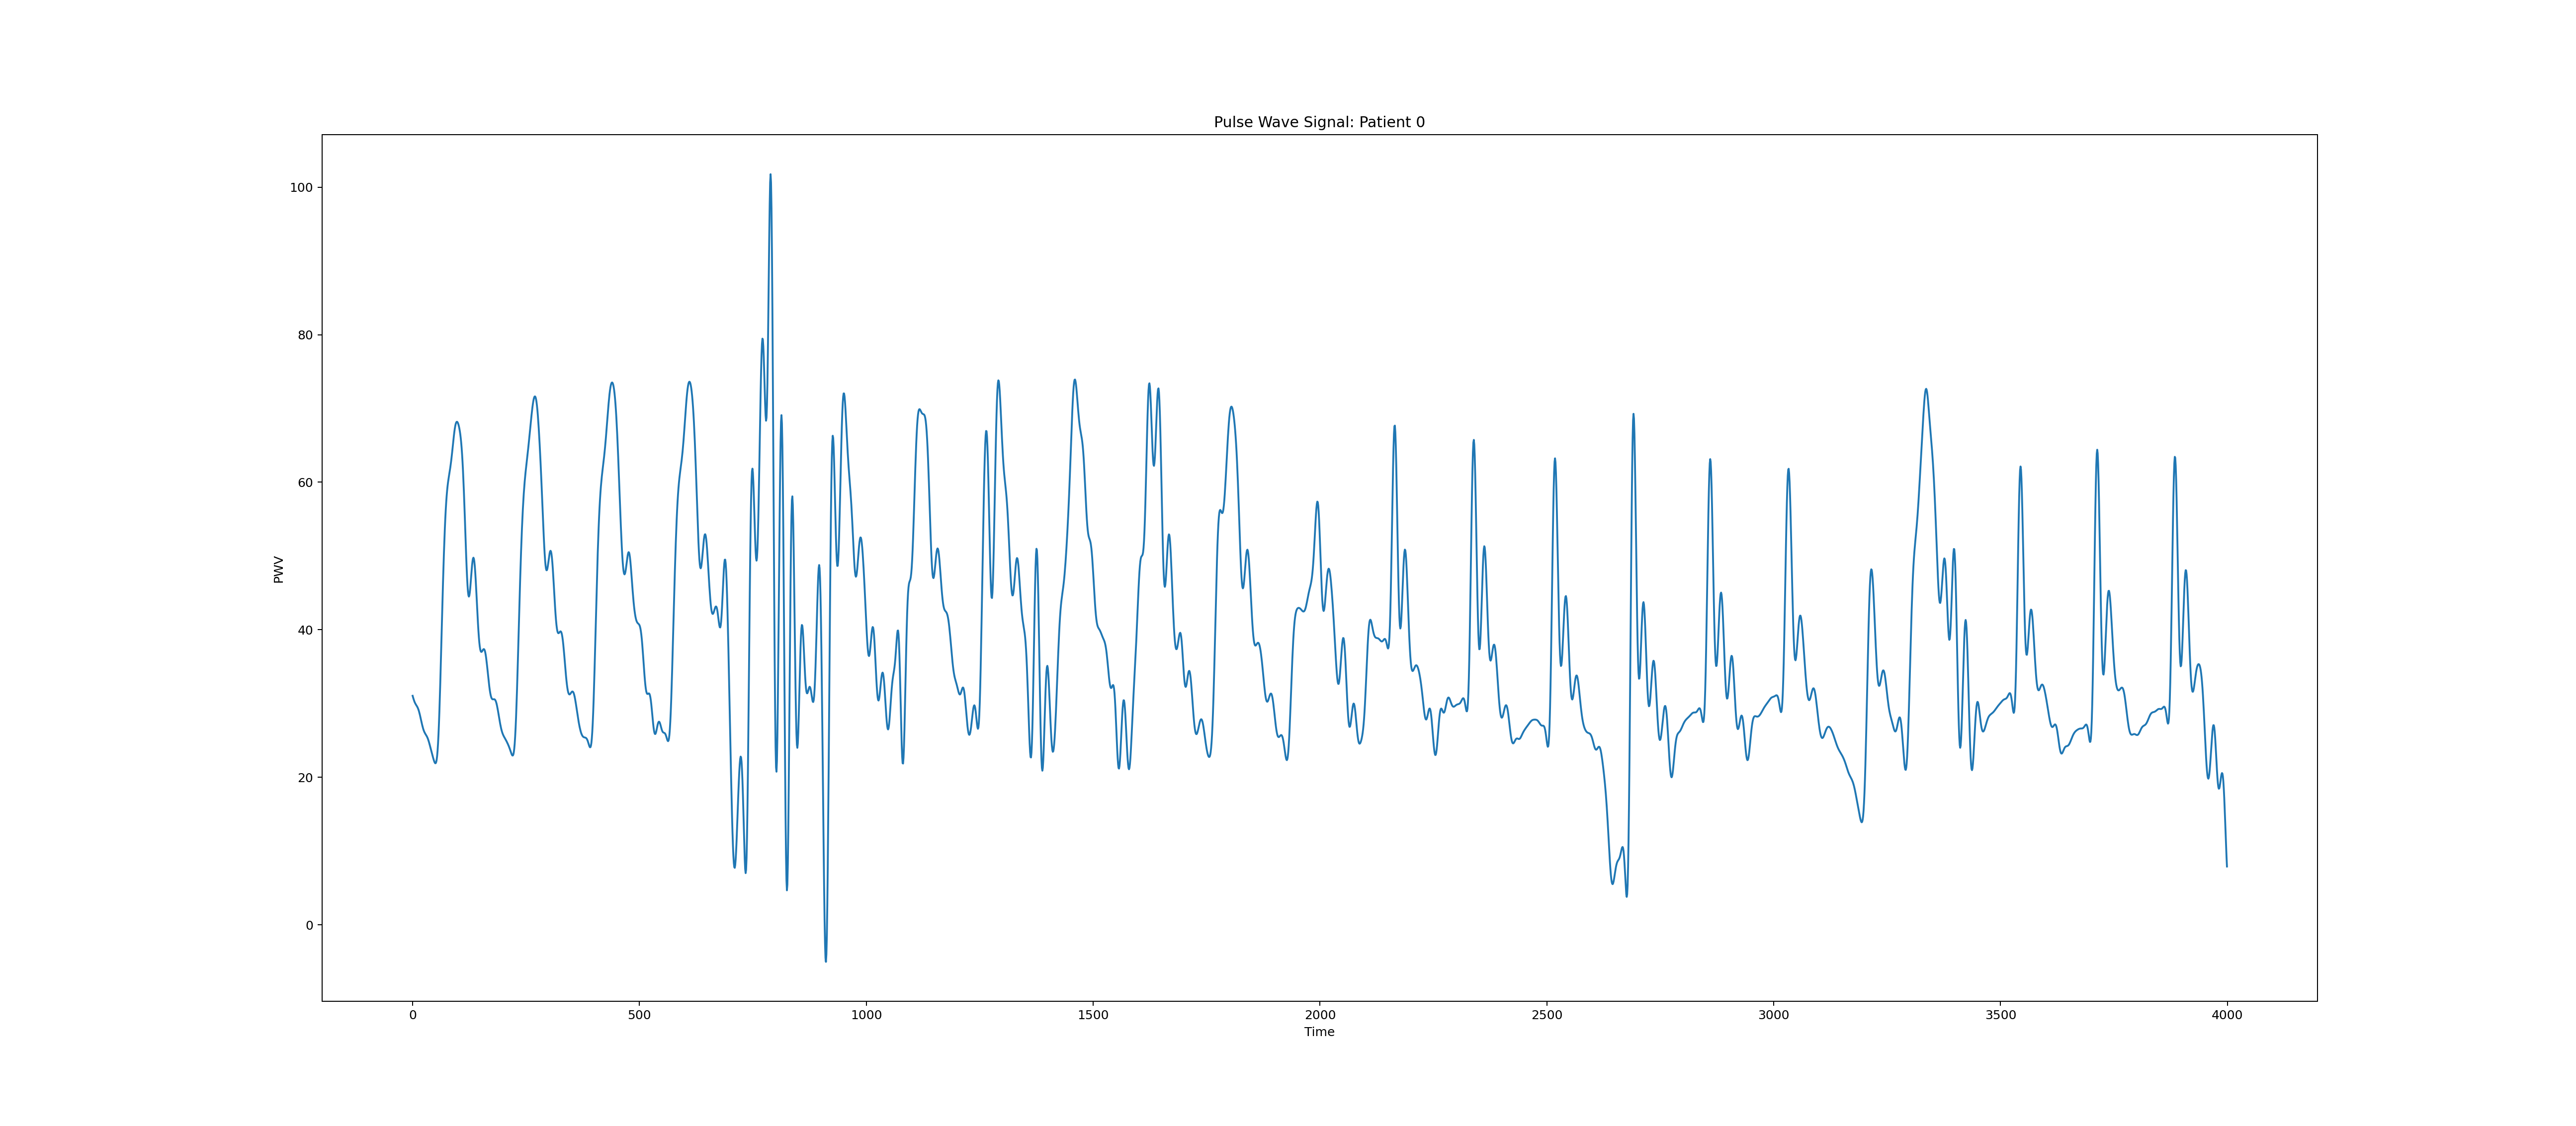

In [107]:
plots[2]

We can segment this waveform into each individual pulsewave.

<IPython.core.display.Javascript object>


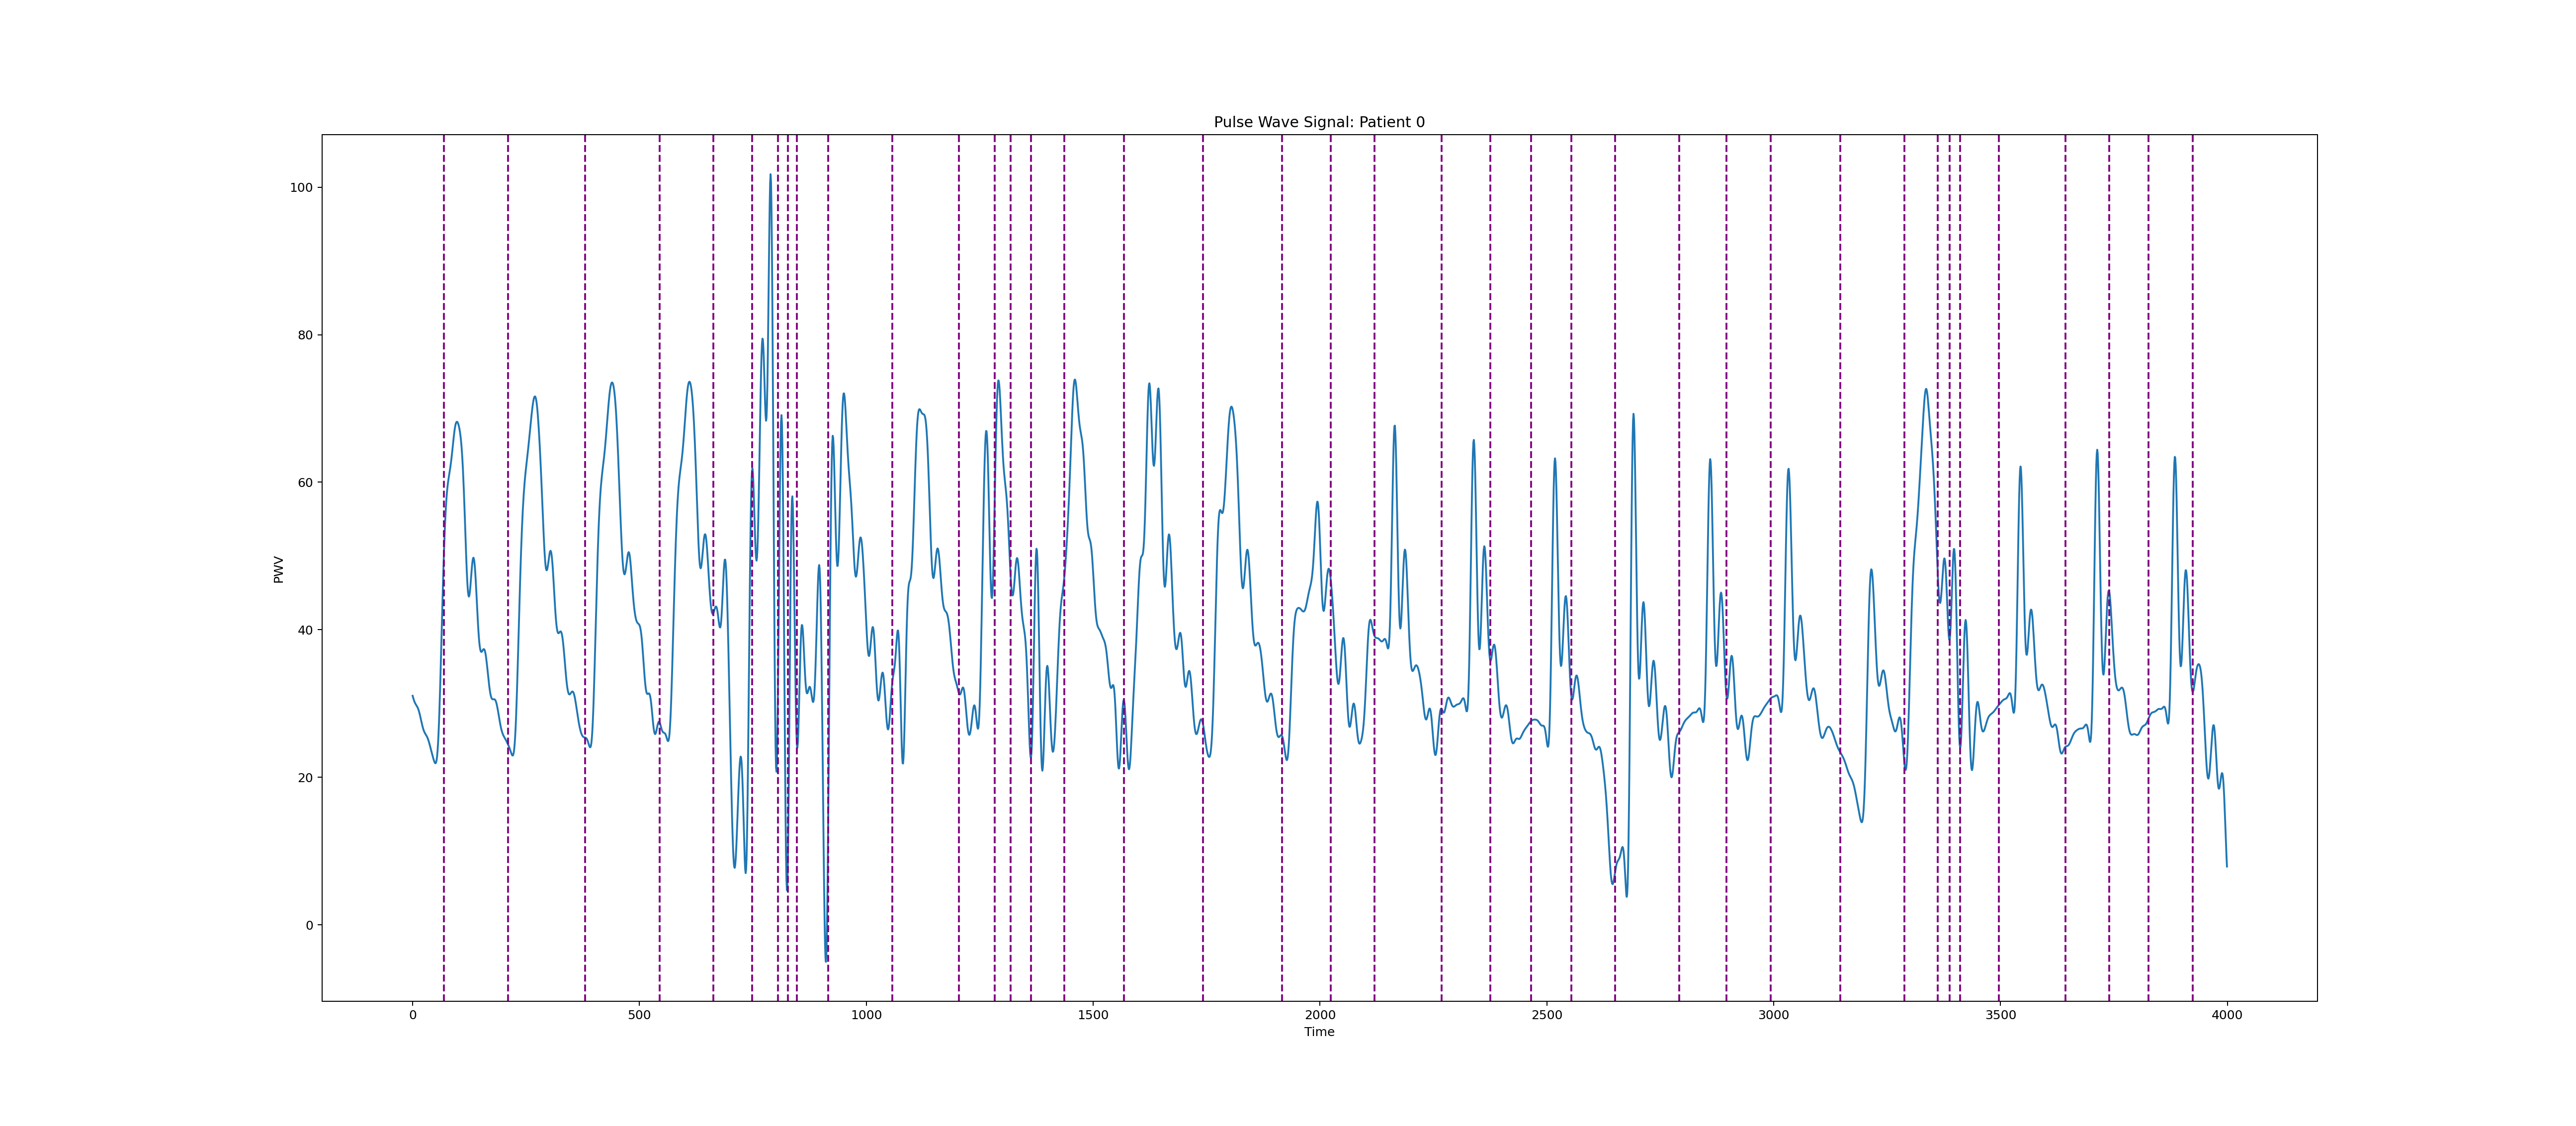

In [108]:
plots[3]

We can also plot inidivdual segments.

seg0
pat0  Figure(1152x504)

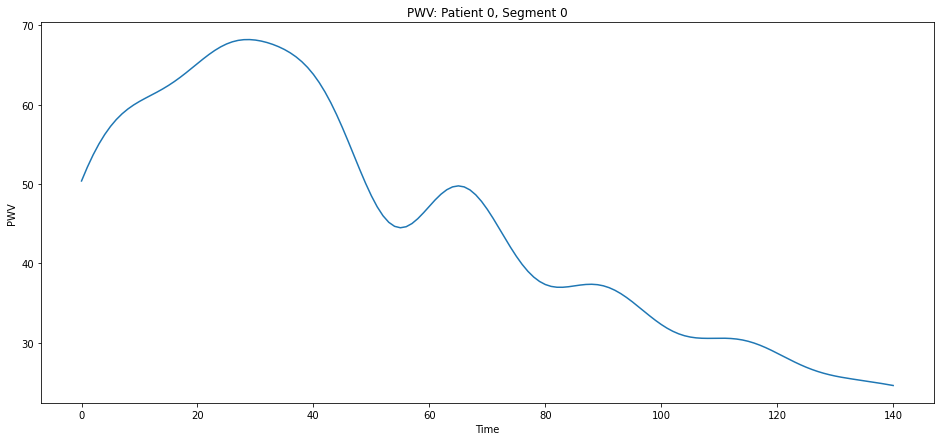

In [91]:
%matplotlib inline

plots = pwv.plotSegment(waveformData, segmentIndices)
display(plots)
plots.iloc[0,0]

<IPython.core.display.Javascript object>


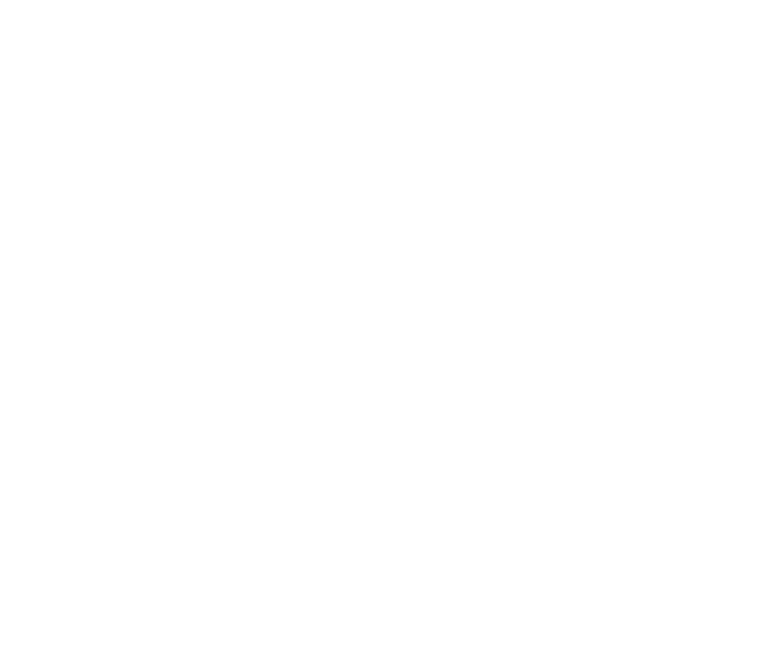

seg0
pat0  Figure(864x720)

<IPython.core.display.Javascript object>


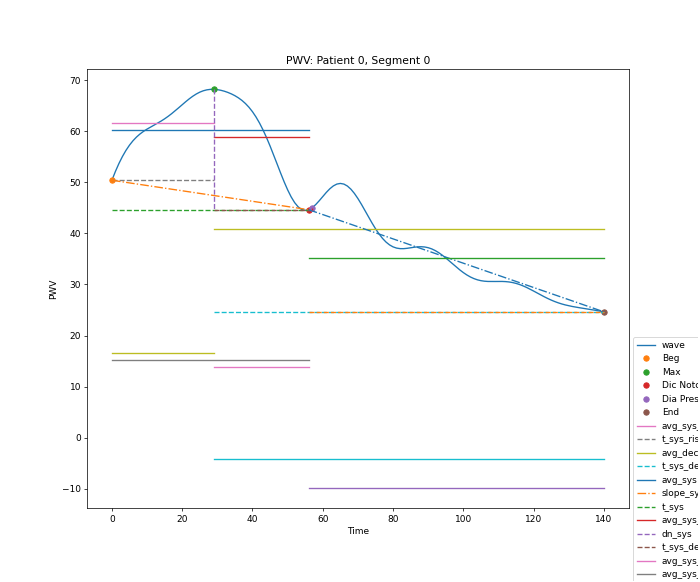

[6349.251351040561, 61.643365161110516, 1787.657589672205, 29, 40.8734997902666, 111, 4536.958476719592, 60.27571266778494, -0.1029044575954006, 3375.4399093959564, 56, 58.806752582361156, 23.56563929938428, 1587.7823197237512, 27, 13.777340401664986, 15.246300487088767, 16.613952980414346, -4.15591239042957, -0.2380282921054951, 84, 35.10923996423622, 0.39975099507167755, -9.920172216459953]


In [161]:
%matplotlib notebook

plots, points, mets = pwv.interPlotSegment(waveformData, segmentIndices)
display(plots)
display(plots.iloc[0,0])
print(mets)








# Metric Calculation

In [193]:
metrics = pwv.analyzeWave(waveformData, segmentIndices)

In [194]:
metrics

0            1          2            3      4          5      6   \
0      0.0  6349.251351  61.643365  1787.657590   29.0  40.873500  111.0   
1      0.0  7455.247002  47.045969  2822.758130   60.0  42.266821  109.0   
2      0.0  7464.048762  48.187912  2891.274718   60.0  44.128444  103.0   
3      0.0  5944.040232  45.611273  3010.344009   66.0  55.606499   52.0   
4      0.0  3692.227808  68.346701  2802.214746   41.0  57.632802   15.0   
...    ...          ...        ...          ...    ...        ...    ...   
1467  20.0  6189.676160  21.688528  2472.492233  114.0  31.371478  118.0   
1468  20.0  3321.504946  19.654247  1395.451502   71.0  21.517858   89.0   
1469  20.0  2881.811787  21.754504   826.671163   38.0  14.954620  137.0   
1470  20.0  4888.033838  21.587747  1597.493265   74.0  25.055006  131.0   
1471  20.0  3897.374942  18.918541  1513.483310   80.0  27.557503   86.0   

               7          8         9   ...    15         16         17  \
0     4536.958477  60.275713 -0.102904  ...  27.0  13.777340  15.246300   
1     4607.083466  51.234883  0.274179  ...  26.0  10.190261   0.523537   
2     4545.229780  52.445397  0.252293  ...  28.0  11.047280   1.924097   
3     2891.537934  50.443885  0.228445  ...  26.0   9.765337  -2.502064   
4      864.492024  66.263221 -0.714020  ...  14.0  34.640564  40.742183   
...           ...        ...       ...  ...   ...        ...        ...   
1467  3701.834347  27.291622  0.206983  ...  31.0  10.457672 -10.147252   
1468  1915.089344  22.105190  0.102307  ...  21.0   6.179322  -2.107202   
1469  2048.782894  23.344781  0.178265  ...  26.0   7.617060   5.292809   
1470  3282.205782  27.929281  0.257025  ...  31.0   8.661690  -6.476166   
1471  2369.945227  24.521999  0.216621  ...  27.0  13.327186  -3.275650   

             18         19        20     21         22        23         24  
0     16.613953  -4.155912 -0.238028   84.0  35.109240  0.399751  15.246300  
1     -3.665377  -8.444525 -0.273187   83.0  36.429418  2.631430   0.523537  
2     -2.333388  -6.392855 -0.267322   75.0  37.617461  2.927912   1.924097  
3     -7.334676   2.660550 -0.244449   26.0  48.501712  4.431975  -2.502064  
4     42.825663  32.111763  3.291439    1.0  22.229599  3.291439  40.742183  
...         ...        ...       ...    ...        ...       ...        ...  
1467 -15.750345  -6.067396 -0.237045   87.0  25.483235  1.466409 -10.147252  
1468  -4.558146  -2.694534 -0.193986   68.0  18.777402  0.057275  -2.107202  
1469   3.702533  -3.097352 -0.144030  111.0  12.444938 -4.293110   5.292809  
1470 -12.817701  -9.350442 -0.251093  100.0  19.471245  0.961337  -6.476166  
1471  -8.879108  -0.240146 -0.298631   59.0  21.348723 -3.767995  -3.275650  

[1472 rows x 25 columns]

# Machine Learning

In [238]:
metrics = metrics[metrics[0]!= 5]
metrics = metrics[metrics[0]!= 17]

outcomes = [0,1,1,0,1,-1,1,0,0,0,0,0,1,1,1,0,0,-1,0,0,1,0]

metrics['25'] = metrics.apply(lambda row: outcomes[int(row[0])], axis=1)
metrics

0            1          2            3      4          5      6  \
0      0.0  6349.251351  61.643365  1787.657590   29.0  40.873500  111.0   
1      0.0  7455.247002  47.045969  2822.758130   60.0  42.266821  109.0   
2      0.0  7464.048762  48.187912  2891.274718   60.0  44.128444  103.0   
3      0.0  5944.040232  45.611273  3010.344009   66.0  55.606499   52.0   
4      0.0  3692.227808  68.346701  2802.214746   41.0  57.632802   15.0   
...    ...          ...        ...          ...    ...        ...    ...   
1467  20.0  6189.676160  21.688528  2472.492233  114.0  31.371478  118.0   
1468  20.0  3321.504946  19.654247  1395.451502   71.0  21.517858   89.0   
1469  20.0  2881.811787  21.754504   826.671163   38.0  14.954620  137.0   
1470  20.0  4888.033838  21.587747  1597.493265   74.0  25.055006  131.0   
1471  20.0  3897.374942  18.918541  1513.483310   80.0  27.557503   86.0   

                7          8         9  ...         16         17         18  \
0     4536.958477  60.275713 -0.102904  ...  13.777340  15.246300  16.613953   
1     4607.083466  51.234883  0.274179  ...  10.190261   0.523537  -3.665377   
2     4545.229780  52.445397  0.252293  ...  11.047280   1.924097  -2.333388   
3     2891.537934  50.443885  0.228445  ...   9.765337  -2.502064  -7.334676   
4      864.492024  66.263221 -0.714020  ...  34.640564  40.742183  42.825663   
...           ...        ...       ...  ...        ...        ...        ...   
1467  3701.834347  27.291622  0.206983  ...  10.457672 -10.147252 -15.750345   
1468  1915.089344  22.105190  0.102307  ...   6.179322  -2.107202  -4.558146   
1469  2048.782894  23.344781  0.178265  ...   7.617060   5.292809   3.702533   
1470  3282.205782  27.929281  0.257025  ...   8.661690  -6.476166 -12.817701   
1471  2369.945227  24.521999  0.216621  ...  13.327186  -3.275650  -8.879108   

             19        20     21         22        23         24  25  
0     -4.155912 -0.238028   84.0  35.109240  0.399751  15.246300   0  
1     -8.444525 -0.273187   83.0  36.429418  2.631430   0.523537   0  
2     -6.392855 -0.267322   75.0  37.617461  2.927912   1.924097   0  
3      2.660550 -0.244449   26.0  48.501712  4.431975  -2.502064   0  
4     32.111763  3.291439    1.0  22.229599  3.291439  40.742183   0  
...         ...       ...    ...        ...       ...        ...  ..  
1467  -6.067396 -0.237045   87.0  25.483235  1.466409 -10.147252   1  
1468  -2.694534 -0.193986   68.0  18.777402  0.057275  -2.107202   1  
1469  -3.097352 -0.144030  111.0  12.444938 -4.293110   5.292809   1  
1470  -9.350442 -0.251093  100.0  19.471245  0.961337  -6.476166   1  
1471  -0.240146 -0.298631   59.0  21.348723 -3.767995  -3.275650   1  

[1202 rows x 26 columns]

In [248]:
x_train, x_test, y_train, y_test = pwv.MLSplit(metrics)

np.where(metrics.values >= np.finfo(np.float32).max)

(array([], dtype=int64), array([], dtype=int64))

In [250]:
z, accuracy, precision, recall = pwv.logistic(x_train, x_test, y_train, y_test)
print(z)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').